In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
food_data = pd.read_csv('/content/drive/MyDrive/Bangkit/food_data.csv')

In [4]:
food_data.head()

,No.,food_id,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Cholesterol
0,1,FD0001,Oatmeal,380,9.93,0.94,69.1,13.7,0
1,2,FD0002,Udon,105,0.63,0.09,21.6,2.6,0
2,3,FD0003,Macaroni and Spaghetti,165,1.56,0.21,32.0,5.4,0
3,4,FD0004,Nonglutinous White Rice,168,0.57,0.10,37.1,2.5,0
4,5,FD0005,Glutinous White Rice,202,0.79,0.15,43.9,3.5,0


In [5]:
food_data.shape

(150, 9)

In [6]:
food_data.duplicated().sum()

0

In [7]:
food_data.isnull().sum()

,0
No.,0
food_id,0
food,0
Caloric Value,0
Fat,0
Saturated Fats,0
Carbohydrates,0
Protein,0
Cholesterol,0


In [8]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             150 non-null    int64  
 1   food_id         150 non-null    object 
 2   food            150 non-null    object 
 3   Caloric Value   150 non-null    int64  
 4   Fat             150 non-null    float64
 5   Saturated Fats  150 non-null    float64
 6   Carbohydrates   150 non-null    float64
 7   Protein         150 non-null    float64
 8   Cholesterol     150 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 10.7+ KB


In [9]:
food_data.describe().T

,count,mean,std,min,25%,50%,75%,max
No.,150.0,75.500000,43.445368,1.0,38.250,75.500,112.7500,150.00
Caloric Value,150.0,160.266667,145.111004,1.0,42.250,129.000,247.0000,587.00
Fat,150.0,10.215067,18.246991,0.0,0.170,0.965,12.5275,101.58
Saturated Fats,150.0,1.896740,3.472920,0.0,0.020,0.175,2.3100,20.52
Carbohydrates,150.0,19.962400,21.323129,0.0,4.925,11.350,25.9000,83.60
Protein,150.0,6.901467,9.186996,0.0,1.000,3.500,9.9000,77.10
Cholesterol,150.0,36.366667,76.895241,0.0,0.000,0.000,47.5000,420.00


**Exploratory Data Analysis (EDA)**

In [10]:
columns_to_plot = food_data.columns.to_list()

In [12]:
def find_top_nutrient_values(food_data, column, top_n=5, highest=True):
    if highest:
        result = food_data.sort_values(by=column, ascending=False).drop_duplicates(subset=[column]).head(top_n)
    else:
        result = food_data.sort_values(by=column, ascending=True).drop_duplicates(subset=[column]).head(top_n)
    return result[["food", column]]

columns_to_plot = food_data.columns.to_list()
columns_to_plot.remove("food")

top_highest = {}
top_lowest = {}

for column in columns_to_plot:
    top_highest[column] = find_top_nutrient_values(food_data, column, top_n=5, highest=True)
    top_lowest[column] = find_top_nutrient_values(food_data, column, top_n=5, highest=False)

for column in columns_to_plot:
    print(f"\nTop 5 makanan dengan {column} tertinggi:")
    print(top_highest[column][["food", column]])

    print(f"\nTop 5 makanan dengan {column} terendah:")
    print(top_lowest[column][["food", column]])


Top 5 makanan dengan No. tertinggi:
              food  No.
149   Fried Banana  150
148   Grilled Ribs  149
147  Chicken Gulai  148
146         Siomay  147
145      Gado-Gado  146

Top 5 makanan dengan No. terendah:
                      food  No.
0                  Oatmeal    1
1                     Udon    2
2   Macaroni and Spaghetti    3
3  Nonglutinous White Rice    4
4     Glutinous White Rice    5

Top 5 makanan dengan food_id tertinggi:
              food food_id
149   Fried Banana  FD0150
148   Grilled Ribs  FD0149
147  Chicken Gulai  FD0148
146         Siomay  FD0147
145      Gado-Gado  FD0146

Top 5 makanan dengan food_id terendah:
                      food food_id
0                  Oatmeal  FD0001
1                     Udon  FD0002
2   Macaroni and Spaghetti  FD0003
3  Nonglutinous White Rice  FD0004
4     Glutinous White Rice  FD0005

Top 5 makanan dengan Caloric Value tertinggi:
                               food  Caloric Value
21                       Raw Almond     

Visualisasi untuk No.:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


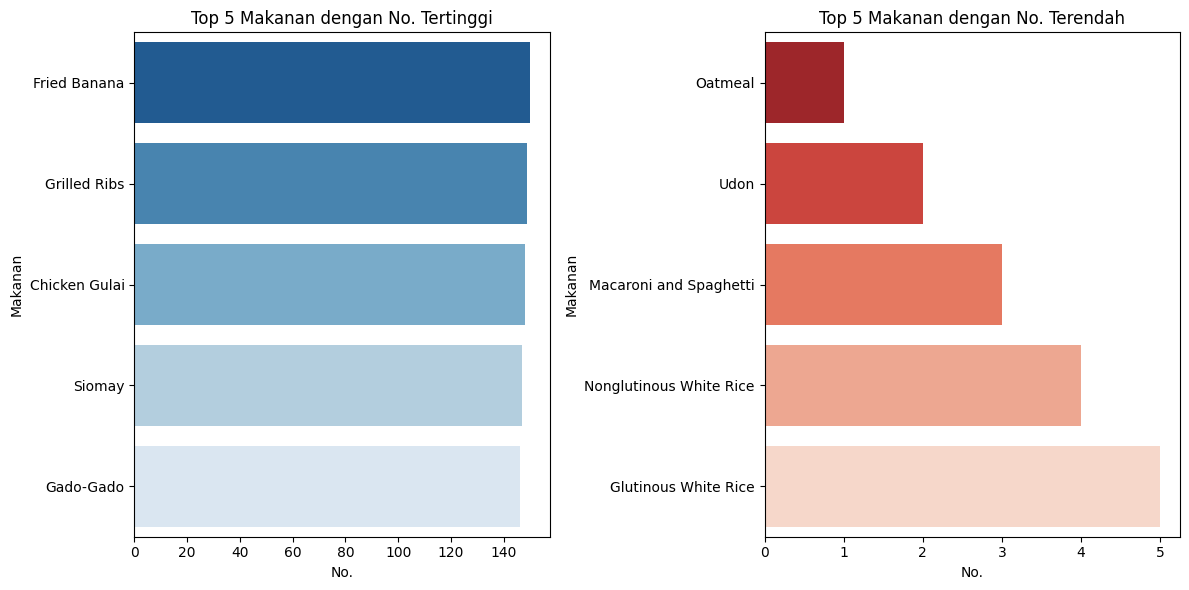

Visualisasi untuk food_id:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


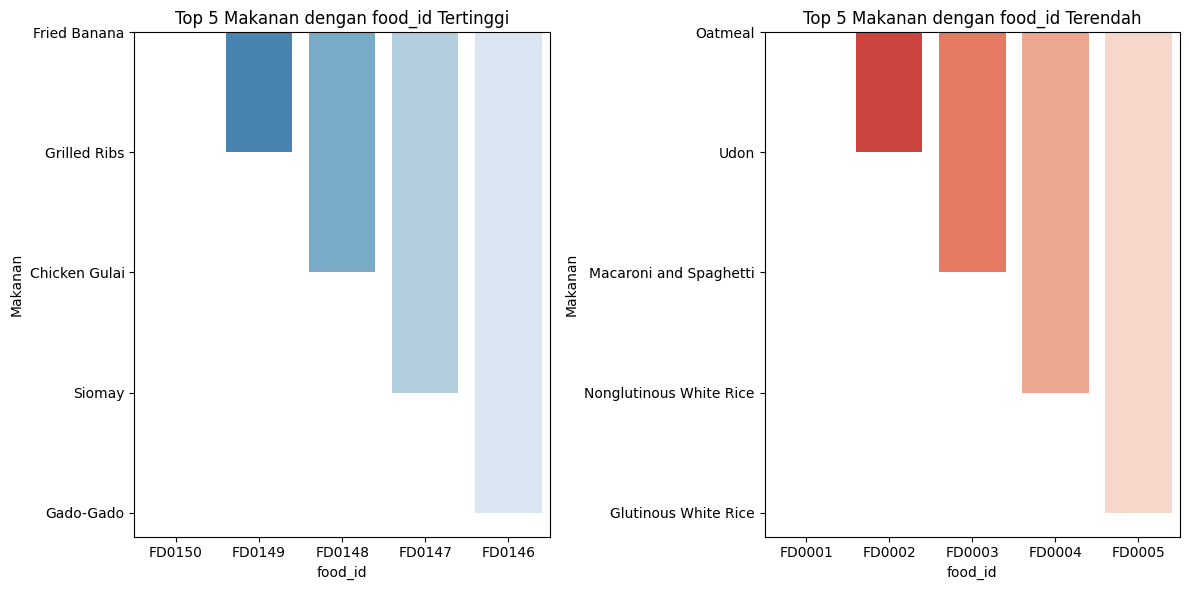

Visualisasi untuk Caloric Value:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


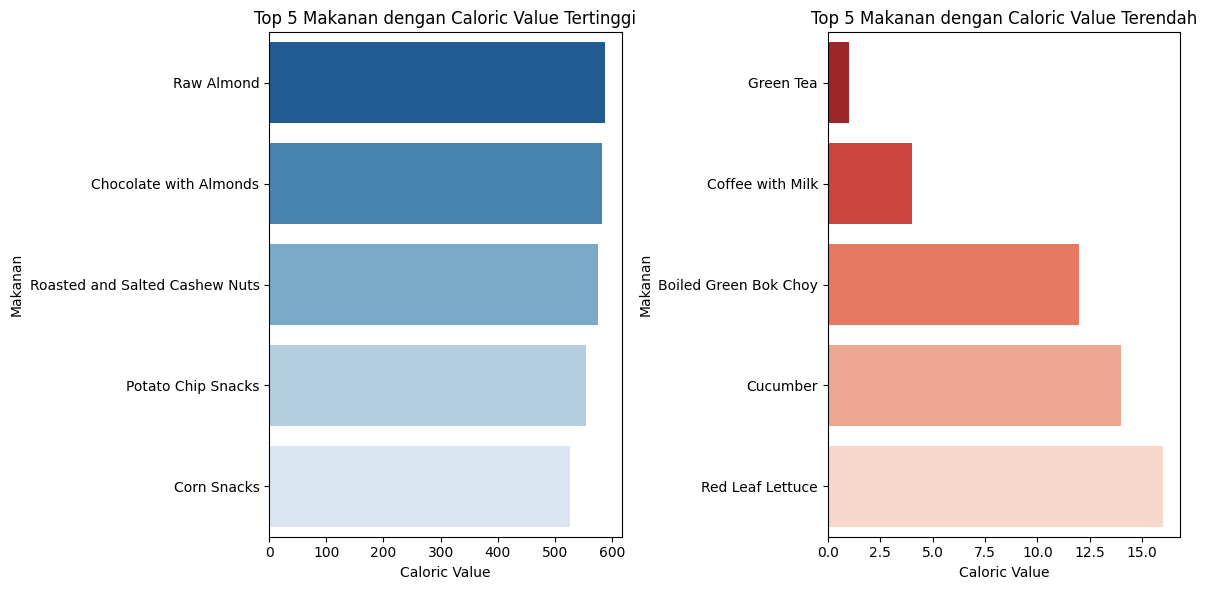

Visualisasi untuk Fat:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


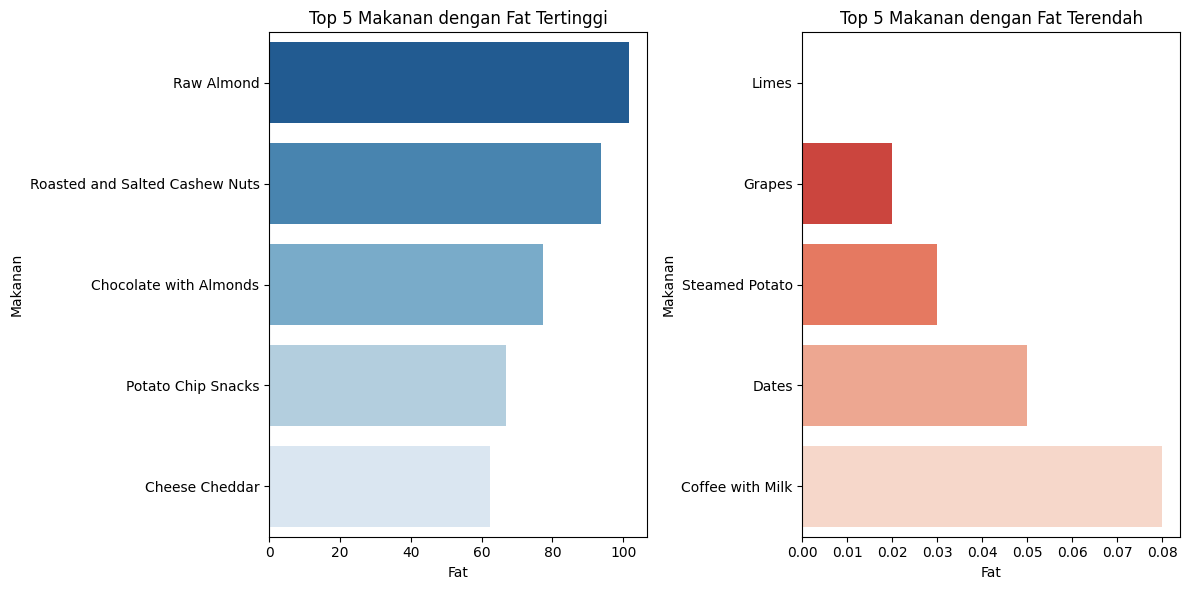

Visualisasi untuk Saturated Fats:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


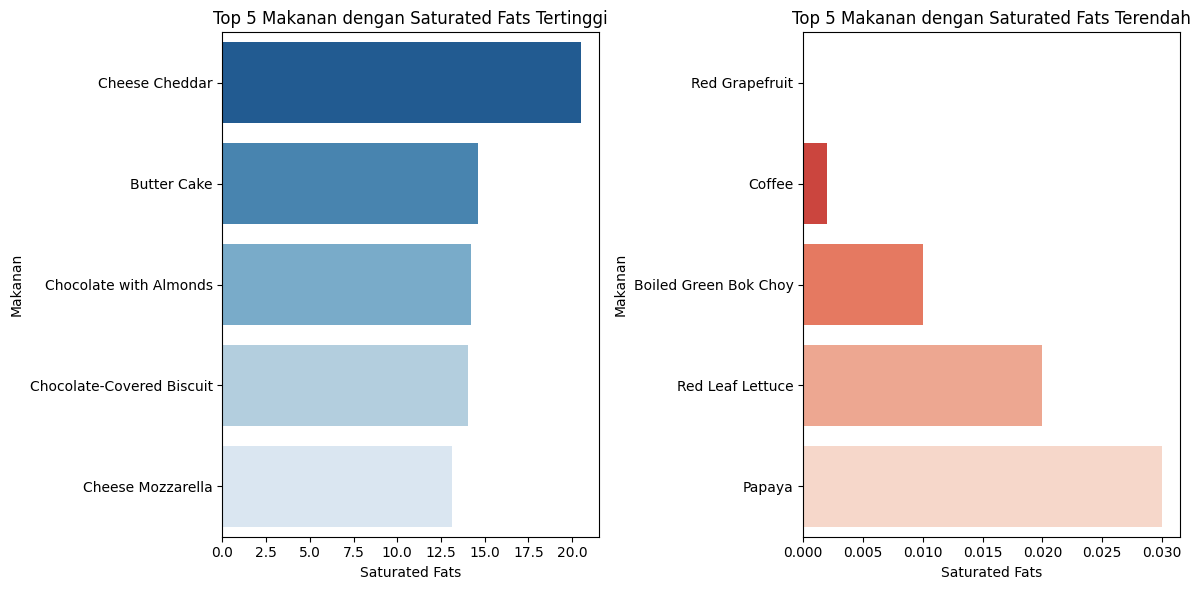

Visualisasi untuk Carbohydrates:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


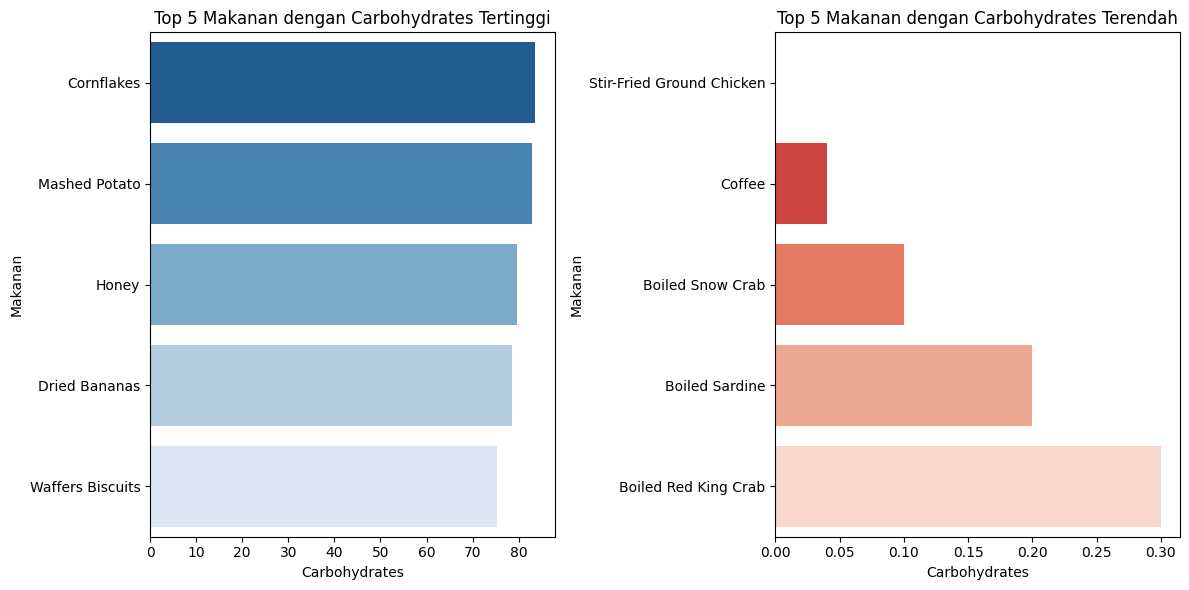

Visualisasi untuk Protein:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


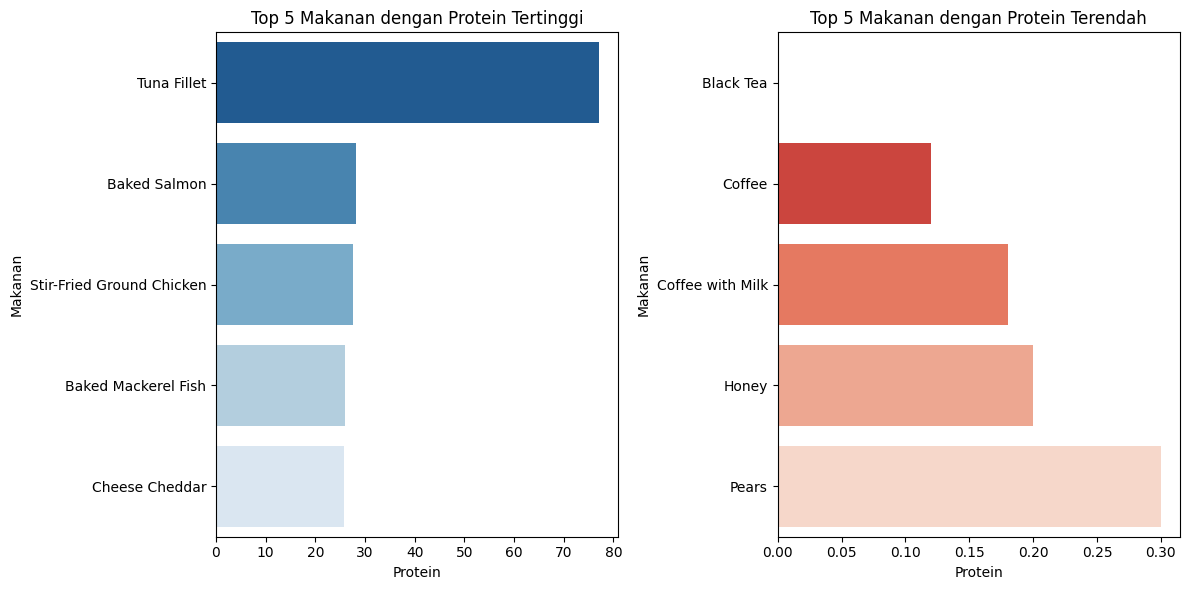

Visualisasi untuk Cholesterol:


<ipython-input-13-ab532f1ab3ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-13-ab532f1ab3ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


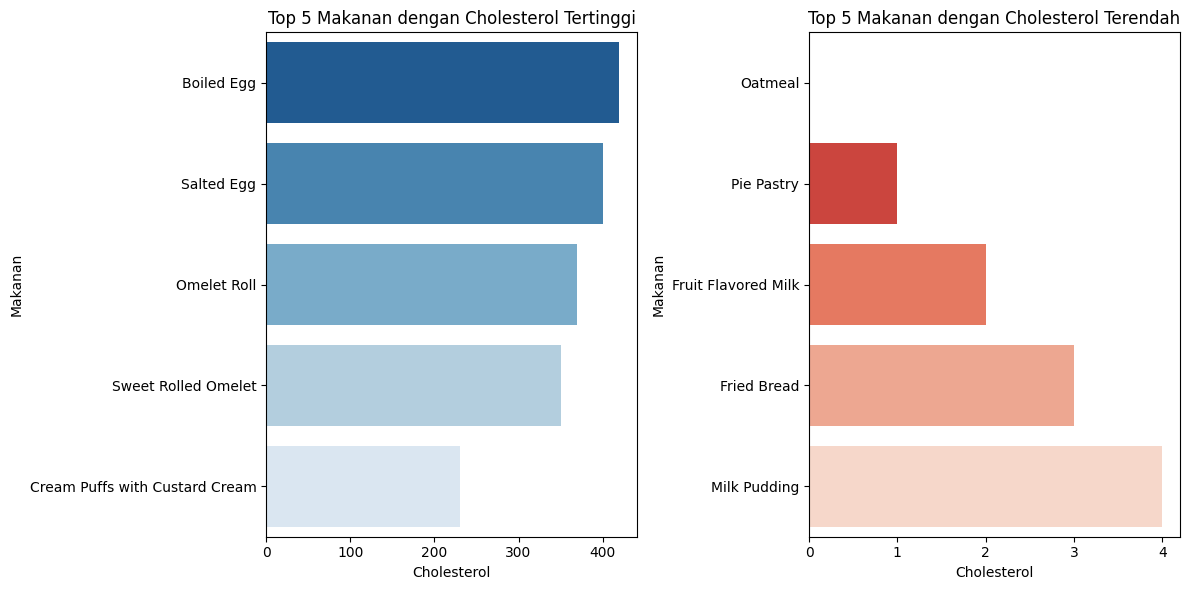

In [13]:
def plot_top_nutrient(data_high, data_low, column):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
    plt.title(f"Top 5 Makanan dengan {column} Tertinggi")
    plt.xlabel(column)
    plt.ylabel("Makanan")

    plt.subplot(1, 2, 2)
    sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")
    plt.title(f"Top 5 Makanan dengan {column} Terendah")
    plt.xlabel(column)
    plt.ylabel("Makanan")

    plt.tight_layout()
    plt.show()

for column in columns_to_plot:
    print(f"Visualisasi untuk {column}:")
    plot_top_nutrient(top_highest[column], top_lowest[column], column)

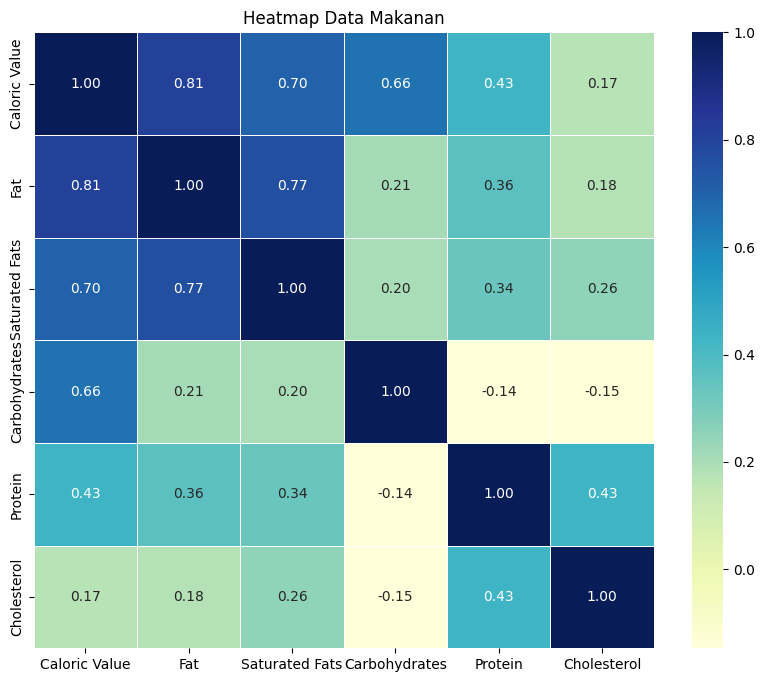

In [14]:
correlation_matrix = food_data[['Caloric Value', 'Fat', 'Saturated Fats', 'Carbohydrates', 'Protein', 'Cholesterol']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Data Makanan")
plt.show()